In [39]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from numpy import random
import datetime
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [40]:
dataset = pd.read_csv(r'C:\Users\HP\Desktop\Machine Learning\temperature_device_failure.csv')
dataset

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551
...,...,...
7262,2014-05-28 11:00:00,72.370206
7263,2014-05-28 12:00:00,72.172956
7264,2014-05-28 13:00:00,72.046565
7265,2014-05-28 14:00:00,71.825226


Data Cleaning

In [41]:
dataset.isnull().sum()

timestamp    0
value        0
dtype: int64

Data Visualization

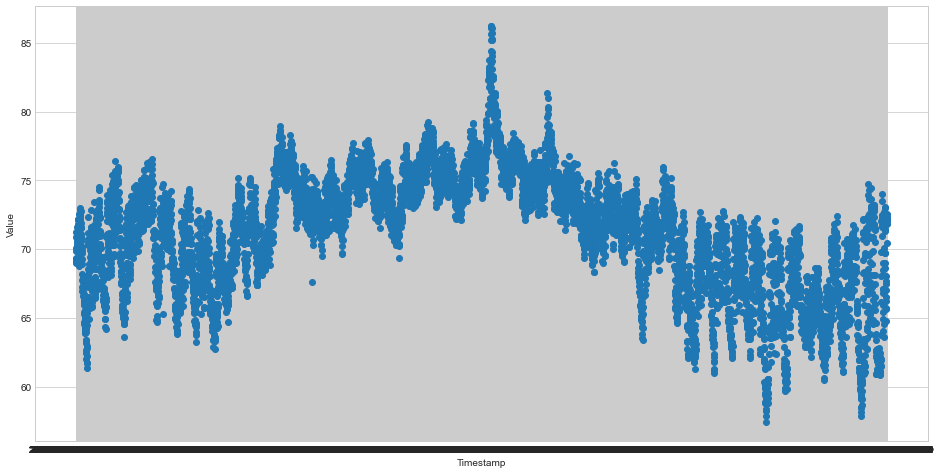

In [4]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(dataset['timestamp'], dataset['value'])
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
plt.show()

Performing Feature Engineering

In [42]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  7267 non-null   datetime64[ns]
 1   value      7267 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 113.7 KB


In [44]:
dataset['hour'] = dataset['timestamp'].dt.hour

In [45]:
dataset['day'] = dataset['timestamp'].dt.dayofweek
dataset['day'] = ((dataset['hour'] >= 6) & (dataset['hour'] <= 16)).astype(int)


In [46]:
dataset['dayofweek'] = dataset['timestamp'].dt.dayofweek

In [47]:
dataset['dayofweekname'] = dataset['timestamp'].dt.day_name()

In [48]:
dataset['time'] = dataset['timestamp'].dt.time

In [49]:
dataset['week'] = (dataset['dayofweek'] < 5).astype(int)


In [50]:
dataset['dtcat'] = dataset['week']*2 + dataset['day']
dataset
#0 is night 1 is day in day dataset
#1 is weekday and 0 is weekend 


,timestamp,value,hour,day,dayofweek,dayofweekname,time,week,dtcat
0,2013-07-04 00:00:00,69.880835,0,0,3,Thursday,00:00:00,1,2
1,2013-07-04 01:00:00,71.220227,1,0,3,Thursday,01:00:00,1,2
2,2013-07-04 02:00:00,70.877805,2,0,3,Thursday,02:00:00,1,2
3,2013-07-04 03:00:00,68.959400,3,0,3,Thursday,03:00:00,1,2
4,2013-07-04 04:00:00,69.283551,4,0,3,Thursday,04:00:00,1,2
...,...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,11,1,2,Wednesday,11:00:00,1,3
7263,2014-05-28 12:00:00,72.172956,12,1,2,Wednesday,12:00:00,1,3
7264,2014-05-28 13:00:00,72.046565,13,1,2,Wednesday,13:00:00,1,3
7265,2014-05-28 14:00:00,71.825226,14,1,2,Wednesday,14:00:00,1,3


In [51]:
dataset['dtcat'].unique()
#0 is weekend night
#1 is weekend day
#2 is weekday night
#3 is weekday day

array([2, 3, 0, 1])

(array([1100.,    0.,    0.,  924.,    0.,    0., 2842.,    0., 2401.]),
 array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
        1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ]),
 <BarContainer object of 9 artists>)

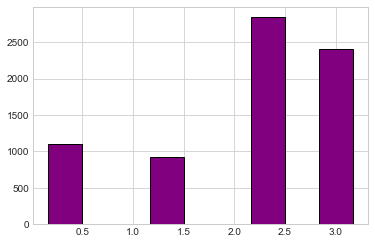

In [52]:
plt.hist(dataset['dtcat'], bins=9, align='right', color='purple', edgecolor='black')

Performing K-means to find the best value of K

In [53]:
dataset.drop(['dayofweekname','time','timestamp'],axis=1, inplace =True)


In [54]:
dataset

,value,hour,day,dayofweek,week,dtcat
0,69.880835,0,0,3,1,2
1,71.220227,1,0,3,1,2
2,70.877805,2,0,3,1,2
3,68.959400,3,0,3,1,2
4,69.283551,4,0,3,1,2
...,...,...,...,...,...,...
7262,72.370206,11,1,2,1,3
7263,72.172956,12,1,2,1,3
7264,72.046565,13,1,2,1,3
7265,71.825226,14,1,2,1,3


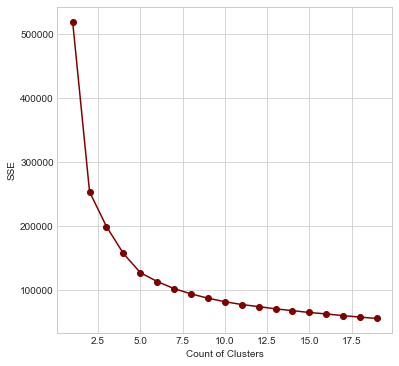

In [55]:
# elbow method to identify optimal value of K
sse = []
for k in range(1, 20):
    km = KMeans(n_clusters=k)
    km.fit(dataset)
    sse.append(km.inertia_)
# plot to identify the elbow
plt.figure(figsize=(6, 6))
plt.plot(range(1, 20), sse, '-o', c = 'maroon')
plt.xlabel('Count of Clusters')
plt.ylabel('SSE');

In [74]:
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing" )

In [75]:
kl.elbow

5

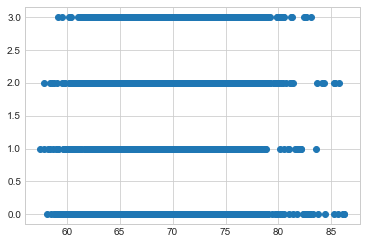

In [56]:
plt.scatter(dataset['value'],dataset['dtcat'])

Performing PCA to dataset

In [57]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = dataset.columns
d = scaler.fit_transform(dataset)
scaled_data = pd.DataFrame(d, columns=names)
scaled_data

,value,hour,day,dayofweek,week,dtcat
0,0.431862,0.000000,0.0,0.500000,1.0,0.666667
1,0.478426,0.043478,0.0,0.500000,1.0,0.666667
2,0.466521,0.086957,0.0,0.500000,1.0,0.666667
3,0.399829,0.130435,0.0,0.500000,1.0,0.666667
4,0.411098,0.173913,0.0,0.500000,1.0,0.666667
...,...,...,...,...,...,...
7262,0.518404,0.478261,1.0,0.333333,1.0,1.000000
7263,0.511547,0.521739,1.0,0.333333,1.0,1.000000
7264,0.507153,0.565217,1.0,0.333333,1.0,1.000000
7265,0.499458,0.608696,1.0,0.333333,1.0,1.000000


In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(scaled_data)

In [59]:
minmax_s=preprocessing.StandardScaler()
scaled= scaler.fit_transform(scaled_data)
scaled_data = pd.DataFrame(scaled)
ncluster=range(1,20)
kmeans = [KMeans(n_clusters=i).fit(scaled_data) for i in ncluster]
scores = [kmeans[i].score(scaled_data) for i in range(len(kmeans))]
dataset['cluster'] = kmeans[3].predict(scaled_data)
dataset['PCA1' ] = scaled_data[0]
dataset['PCA2' ] = scaled_data[1]
dataset['cluster' ].value_counts()

0    2842
1    2401
3    1100
2     924
Name: cluster, dtype: int64

In [60]:
dataset

,value,hour,day,dayofweek,week,dtcat,cluster,PCA1,PCA2
0,69.880835,0,0,3,1,2,0,0.431862,0.000000
1,71.220227,1,0,3,1,2,0,0.478426,0.043478
2,70.877805,2,0,3,1,2,0,0.466521,0.086957
3,68.959400,3,0,3,1,2,0,0.399829,0.130435
4,69.283551,4,0,3,1,2,0,0.411098,0.173913
...,...,...,...,...,...,...,...,...,...
7262,72.370206,11,1,2,1,3,1,0.518404,0.478261
7263,72.172956,12,1,2,1,3,1,0.511547,0.521739
7264,72.046565,13,1,2,1,3,1,0.507153,0.565217
7265,71.825226,14,1,2,1,3,1,0.499458,0.608696


In [61]:
dataset['cluster'].unique()

array([0, 1, 3, 2])

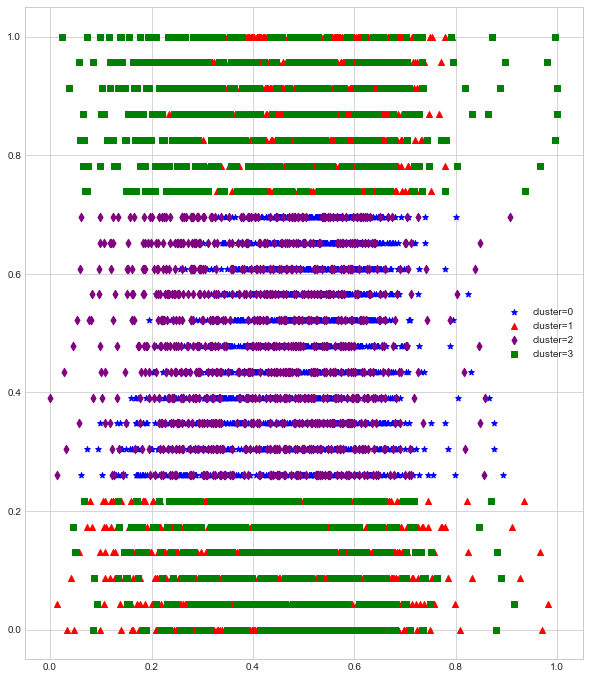

In [26]:
from matplotlib.pyplot import figure
plt.figure(figsize=(10, 12))
dataset1=dataset[dataset['cluster']==0]
dataset2=dataset[dataset['cluster']==1]
dataset3=dataset[dataset['cluster']==2]
dataset4=dataset[dataset['cluster']==3]


# PLOT
plt.scatter(dataset1['PCA1'],dataset1['PCA2'],color='blue', marker= '*', label='cluster=0')
plt.scatter(dataset2['PCA1'],dataset2['PCA2'],color= 'red', marker='^', label='cluster=1')
plt.scatter(dataset3['PCA1'],dataset3['PCA2'],color= 'purple', marker='d', label='cluster=2')
plt.scatter(dataset4['PCA1'],dataset4['PCA2'],color='green', marker= ',', label='cluster=3')

plt.legend()

Performing IQR rule

In [62]:
outliers_fraction = 0.01

In [63]:
dataset

,value,hour,day,dayofweek,week,dtcat,cluster,PCA1,PCA2
0,69.880835,0,0,3,1,2,0,0.431862,0.000000
1,71.220227,1,0,3,1,2,0,0.478426,0.043478
2,70.877805,2,0,3,1,2,0,0.466521,0.086957
3,68.959400,3,0,3,1,2,0,0.399829,0.130435
4,69.283551,4,0,3,1,2,0,0.411098,0.173913
...,...,...,...,...,...,...,...,...,...
7262,72.370206,11,1,2,1,3,1,0.518404,0.478261
7263,72.172956,12,1,2,1,3,1,0.511547,0.521739
7264,72.046565,13,1,2,1,3,1,0.507153,0.565217
7265,71.825226,14,1,2,1,3,1,0.499458,0.608696


value           AxesSubplot(0.125,0.657941;0.227941x0.222059)
hour         AxesSubplot(0.398529,0.657941;0.227941x0.222059)
day          AxesSubplot(0.672059,0.657941;0.227941x0.222059)
dayofweek       AxesSubplot(0.125,0.391471;0.227941x0.222059)
week         AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtcat        AxesSubplot(0.672059,0.391471;0.227941x0.222059)
cluster            AxesSubplot(0.125,0.125;0.227941x0.222059)
PCA1            AxesSubplot(0.398529,0.125;0.227941x0.222059)
PCA2            AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

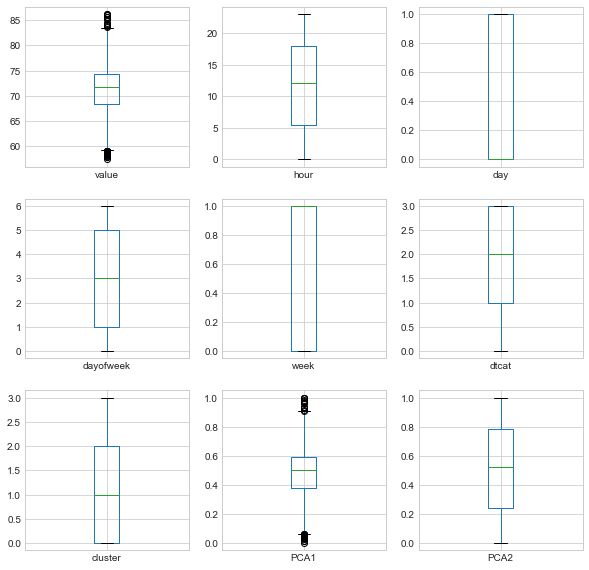

In [64]:
dataset.plot(kind="box", subplots=True, layout=(3,3), figsize=(10,10))

In [65]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn, [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [66]:
lowerbound,upperbound = outlier_treatment(dataset.value)

In [67]:
dataset[(dataset.value < lowerbound) | (dataset.value > upperbound)]

,value,hour,day,dayofweek,week,dtcat,cluster,PCA1,PCA2
3702,83.780995,1,0,6,0,0,3,0.915097,0.043478
3718,84.390932,17,0,6,0,0,3,0.936301,0.739130
3719,85.227685,18,0,6,0,0,3,0.965391,0.782609
3720,86.094888,19,0,6,0,0,3,0.995539,0.826087
3721,86.204189,20,0,6,0,0,3,0.999339,0.869565
3722,86.223213,21,0,6,0,0,3,1.000000,0.913043
3723,85.649437,22,0,6,0,0,3,0.980053,0.956522
3724,86.074710,23,0,6,0,0,3,0.994837,1.000000
3725,85.326165,0,0,0,1,2,0,0.968814,0.000000
3726,85.705990,1,0,0,1,2,0,0.982019,0.043478


In [68]:
dataset.drop(dataset[ (dataset.value > upperbound) | (dataset.value < lowerbound) ].index , inplace=True)

value           AxesSubplot(0.125,0.657941;0.227941x0.222059)
hour         AxesSubplot(0.398529,0.657941;0.227941x0.222059)
day          AxesSubplot(0.672059,0.657941;0.227941x0.222059)
dayofweek       AxesSubplot(0.125,0.391471;0.227941x0.222059)
week         AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtcat        AxesSubplot(0.672059,0.391471;0.227941x0.222059)
cluster            AxesSubplot(0.125,0.125;0.227941x0.222059)
PCA1            AxesSubplot(0.398529,0.125;0.227941x0.222059)
PCA2            AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

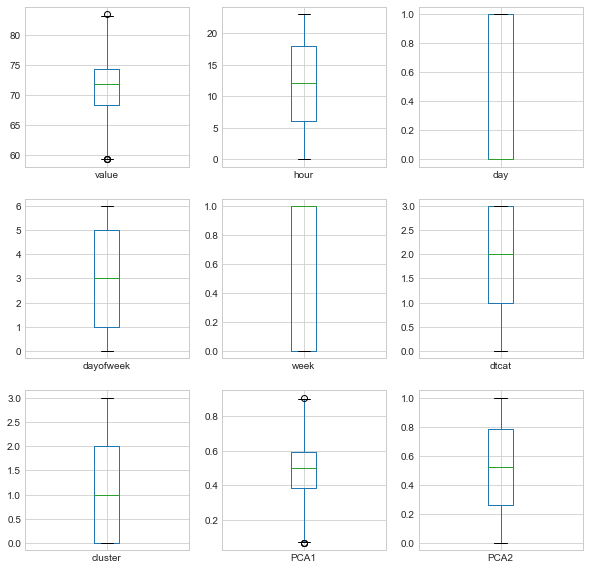

In [70]:
dataset.plot(kind="box", subplots=True, layout=(3,3), figsize=(10,10))

Performing Isolation Forest

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

data = dataset[['value', 'hour']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

# train isolation forest
model =  IsolationForest(contamination=0.01)
model.fit(data)

dataset['anomaly'] = pd.Series(model.predict(data))

print(dataset['anomaly'].value_counts())

 1.0    7130
-1.0      67
Name: anomaly, dtype: int64


In [72]:
anomaly=dataset.loc[dataset['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

          value  hour  day  dayofweek  week  dtcat  cluster      PCA1  \
3697  82.289240    20    0          5     0      0        3  0.863237   
3698  82.989869    21    0          5     0      0        3  0.887594   
3699  83.247886    22    0          5     0      0        3  0.896564   
3700  82.519659    23    0          5     0      0        3  0.871247   
3701  82.736802     0    0          6     0      0        3  0.878796   
...         ...   ...  ...        ...   ...    ...      ...       ...   
7003  62.794053    16    1          5     0      1        2  0.185492   
7143  72.705910    12    1          4     1      3        1  0.530075   
7165  62.639987    10    1          5     0      1        2  0.180136   
7167  62.245676    12    1          5     0      1        2  0.166428   
7168  62.118922    13    1          5     0      1        2  0.162021   

          PCA2  anomaly  
3697  0.869565     -1.0  
3698  0.913043     -1.0  
3699  0.956522     -1.0  
3700  1.000000     

In [73]:
dataset

,value,hour,day,dayofweek,week,dtcat,cluster,PCA1,PCA2,anomaly
0,69.880835,0,0,3,1,2,0,0.431862,0.000000,1.0
1,71.220227,1,0,3,1,2,0,0.478426,0.043478,1.0
2,70.877805,2,0,3,1,2,0,0.466521,0.086957,1.0
3,68.959400,3,0,3,1,2,0,0.399829,0.130435,1.0
4,69.283551,4,0,3,1,2,0,0.411098,0.173913,1.0
...,...,...,...,...,...,...,...,...,...,...
7262,72.370206,11,1,2,1,3,1,0.518404,0.478261,NaN
7263,72.172956,12,1,2,1,3,1,0.511547,0.521739,NaN
7264,72.046565,13,1,2,1,3,1,0.507153,0.565217,NaN
7265,71.825226,14,1,2,1,3,1,0.499458,0.608696,NaN


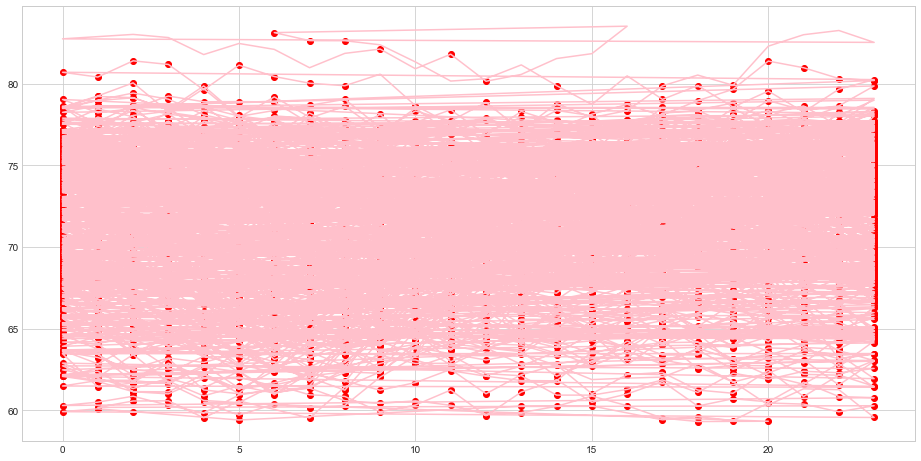

In [58]:
fig, ax= plt.subplots(figsize=(16,8))
a = dataset.loc[dataset['anomaly'] == 1, ['hour','value']]#anomaly
ax.plot(dataset['hour'], dataset['value'], color='pink')
ax.scatter(a['hour'],a[ 'value' ], color='red' )
plt.show()

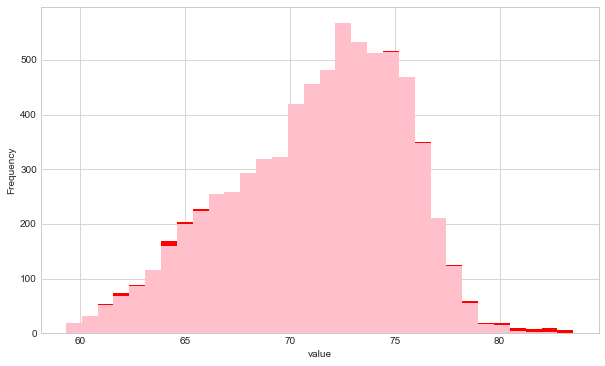

In [50]:
a = dataset.loc[dataset['anomaly'] == 1, 'value']
b = dataset.loc[dataset['anomaly'] == -1, 'value']

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, stacked=True, color=['pink', 'red'])
plt.xlabel('value')
plt.ylabel('Frequency')
plt.show()

In [51]:
dataset.describe()

,value,hour,day,dayofweek,week,dtcat,cluster,PCA1,PCA2,anomaly
count,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7197.000000
mean,71.252086,11.516178,0.458379,2.983960,0.723313,1.905006,1.094994,0.479533,0.500703,0.981937
std,4.158366,6.920855,0.498299,1.973694,0.447391,1.024775,1.024775,0.144564,0.300907,0.189222
min,59.316661,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064602,0.000000,-1.000000
25%,68.404350,6.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.380533,0.260870,1.000000
50%,71.860208,12.000000,0.000000,3.000000,1.000000,2.000000,1.000000,0.500674,0.521739,1.000000
75%,74.422168,18.000000,1.000000,5.000000,1.000000,3.000000,2.000000,0.589740,0.782609,1.000000
max,83.511630,23.000000,1.000000,6.000000,1.000000,3.000000,3.000000,0.905733,1.000000,1.000000


In [52]:
outliers_counter = len(dataset[dataset['value'] > 74.422168])
outliers_counter

1808

In [53]:
print("Accuracy of Isolation Forest:", 100*list(dataset['anomaly']).count(-1)/(outliers_counter))

Accuracy of Isolation Forest: 3.5951327433628317


Performing Elliptic Envelope

In [54]:
from sklearn.covariance import EllipticEnvelope
ee = dataset.copy()

In [55]:
EE = EllipticEnvelope(contamination = 0.01).fit(ee[['value']])

In [56]:
ee['outlier']=EE.predict(ee[['value']])
ee

,value,hour,day,dayofweek,week,dtcat,cluster,PCA1,PCA2,anomaly,outlier
0,69.880835,0,0,3,1,2,1,0.431862,0.000000,1.0,1
1,71.220227,1,0,3,1,2,1,0.478426,0.043478,1.0,1
2,70.877805,2,0,3,1,2,1,0.466521,0.086957,1.0,1
3,68.959400,3,0,3,1,2,1,0.399829,0.130435,1.0,1
4,69.283551,4,0,3,1,2,1,0.411098,0.173913,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
7262,72.370206,11,1,2,1,3,0,0.518404,0.478261,NaN,1
7263,72.172956,12,1,2,1,3,0,0.511547,0.521739,NaN,1
7264,72.046565,13,1,2,1,3,0,0.507153,0.565217,NaN,1
7265,71.825226,14,1,2,1,3,0,0.499458,0.608696,NaN,1


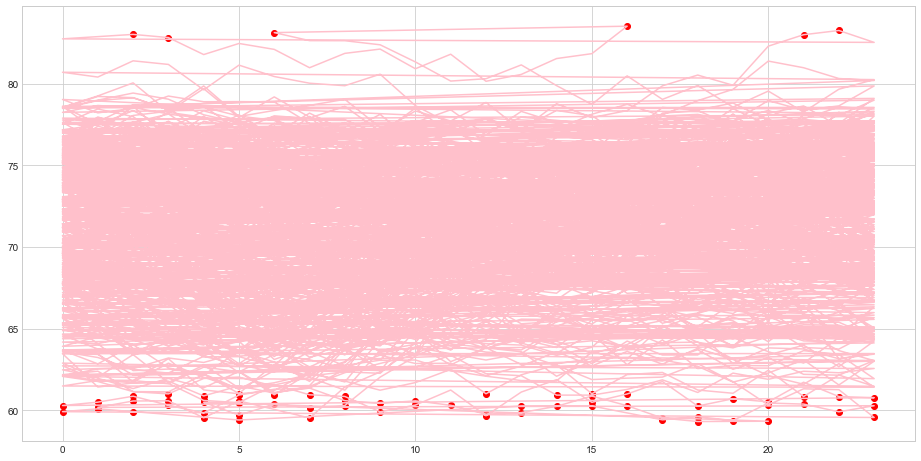

In [57]:
fig, ax= plt.subplots(figsize=(16,8))
a = ee.loc[ee['outlier'] == -1, ['hour','value']]#anomaly
ax.plot(ee['hour'], ee['value'], color='pink')
ax.scatter(a['hour'],a[ 'value' ], color='red' )
plt.show()

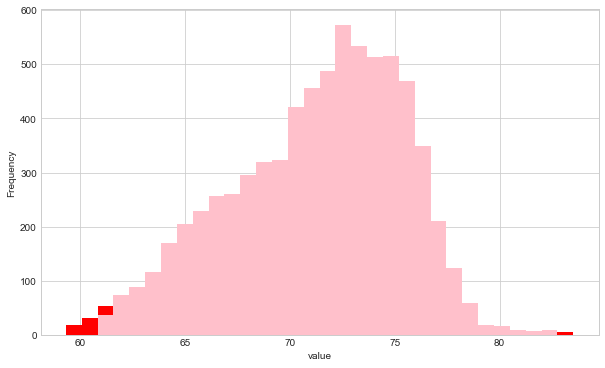

In [59]:
a = ee.loc[ee['outlier'] == 1, 'value']
b = ee.loc[ee['outlier'] == -1, 'value']

fig, axs = plt.subplots(figsize=(10, 6))
axs.hist([a,b], bins=32, stacked=True, color=['pink', 'red'])
plt.xlabel('value')
plt.ylabel('Frequency')
plt.show();

In [60]:
ee.describe()

,value,hour,day,dayofweek,week,dtcat,cluster,PCA1,PCA2,anomaly,outlier
count,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7197.000000,7232.000000
mean,71.252086,11.516178,0.458379,2.983960,0.723313,1.905006,1.094994,0.479533,0.500703,0.981937,0.979812
std,4.158366,6.920855,0.498299,1.973694,0.447391,1.024775,1.024775,0.144564,0.300907,0.189222,0.199935
min,59.316661,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064602,0.000000,-1.000000,-1.000000
25%,68.404350,6.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.380533,0.260870,1.000000,1.000000
50%,71.860208,12.000000,0.000000,3.000000,1.000000,2.000000,1.000000,0.500674,0.521739,1.000000,1.000000
75%,74.422168,18.000000,1.000000,5.000000,1.000000,3.000000,2.000000,0.589740,0.782609,1.000000,1.000000
max,83.511630,23.000000,1.000000,6.000000,1.000000,3.000000,3.000000,0.905733,1.000000,1.000000,1.000000


In [64]:
outlier_count = len(ee[ee['value'] > 74.422168])
outlier_count

1808

In [65]:
print("Accuracy of the EE:", 100*list(ee['outlier']).count(-1)/(outlier_count))

Accuracy of the EE: 4.037610619469026


Elliptic Envelope is the best algorithm